# Question Q2

*Question*: Based on your experience, what activities do you consider to be most difficult when defining requirements for ML-enabled systems?

*Answer Type*: Multiple Single Option

*Options*: [Very Easy, Easy, Neutral, Complex, Very Complex, I don't know]

### Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from utils.basic import rename_values
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
ml_stages = {
    'Q2_ML_Life_Cycle_Difficulty_Problem_Understanding': 'Problem Understanding',
    'Q2_ML_Life_Cycle_Difficulty_Data_Collection': 'Data Collection',
    'Q2_ML_Life_Cycle_Difficulty_Data_Pre-Processing': 'Data Pre-Processing',
    'Q2_ML_Life_Cycle_Difficulty_Model_Creation': 'Model Creation',
    'Q2_ML_Life_Cycle_Difficulty_Model_Evaluation': 'Model Evaluation',
    'Q2_ML_Life_Cycle_Difficulty_Model_Deployment': 'Model Deployment',
    'Q2_ML_Life_Cycle_Difficulty_Model_Monitoring': 'Model Monitoring'
}

### Basic Analysis

In [4]:
dataframe_obj.df[['Q2_ML_Life_Cycle_Difficulty_Problem_Understanding', 'Q2_ML_Life_Cycle_Difficulty_Data_Collection',
'Q2_ML_Life_Cycle_Difficulty_Data_Pre-Processing', 'Q2_ML_Life_Cycle_Difficulty_Model_Creation',
'Q2_ML_Life_Cycle_Difficulty_Model_Evaluation', 'Q2_ML_Life_Cycle_Difficulty_Model_Deployment',
'Q2_ML_Life_Cycle_Difficulty_Model_Monitoring']].head()

,Q2_ML_Life_Cycle_Difficulty_Problem_Understanding,Q2_ML_Life_Cycle_Difficulty_Data_Collection,Q2_ML_Life_Cycle_Difficulty_Data_Pre-Processing,Q2_ML_Life_Cycle_Difficulty_Model_Creation,Q2_ML_Life_Cycle_Difficulty_Model_Evaluation,Q2_ML_Life_Cycle_Difficulty_Model_Deployment,Q2_ML_Life_Cycle_Difficulty_Model_Monitoring
0,0,0,0,0,0,0,0
1,Complex,Complex,Very Complex,Very Complex,Complex,Very Complex,Neutral
2,Complex,Very Complex,Complex,Complex,Neutral,Neutral,Complex
3,Complex,Easy,Easy,Neutral,Complex,Very Complex,Easy
4,Neutral,Neutral,Complex,Complex,Very Complex,Very Complex,Neutral


In [5]:
# cleaning data in all Q2 columns

# replace two 'not checked' values (0 and -77) to "I don't know" value

dataframe_obj.replace_list_values_by_condition(
    'Q2_ML_Life_Cycle_Difficulty_Problem_Understanding', ["0", "-77"], "I don't know", "eq")
dataframe_obj.replace_list_values_by_condition(
    'Q2_ML_Life_Cycle_Difficulty_Data_Collection', ["0", "-77"], "I don't know", "eq")
dataframe_obj.replace_list_values_by_condition(
    'Q2_ML_Life_Cycle_Difficulty_Data_Pre-Processing', ["0", "-77"], "I don't know", "eq")
dataframe_obj.replace_list_values_by_condition(
    'Q2_ML_Life_Cycle_Difficulty_Model_Creation', ["0", "-77"], "I don't know", "eq")
dataframe_obj.replace_list_values_by_condition(
    'Q2_ML_Life_Cycle_Difficulty_Model_Evaluation', ["0", "-77"], "I don't know", "eq")
dataframe_obj.replace_list_values_by_condition(
    'Q2_ML_Life_Cycle_Difficulty_Model_Deployment', ["0", "-77"], "I don't know", "eq")
dataframe_obj.replace_list_values_by_condition(
    'Q2_ML_Life_Cycle_Difficulty_Model_Monitoring', ["0", "-77"], "I don't know", "eq")

In [6]:
# each ML stage has a different distribution of answers
data_plot_df = {"Very Complex": [],
                "Complex": [],
                "Neutral": [],
                "Easy": [],
                "Very Easy": [],
                # "I don't know": []
               }
index_plot_df = []

for ml_stage in ml_stages:
    # barplot data
    index_plot_df.append(ml_stages[ml_stage])
    for dpd in data_plot_df:
        total_count = dataframe_obj.df[ml_stage].value_counts().get(dpd)
        data_plot_df[dpd].append(total_count if total_count else 0)

# plot object
q2_plot = PlotUtils(pd.DataFrame(
    data=data_plot_df, index=index_plot_df
).sort_values(by=['Very Complex'], ascending=True))
# turn into percentage the values in each row
q2_plot.df = q2_plot.df.div(q2_plot.df.sum(axis=1), axis=0).mul(100).round(2)
                           

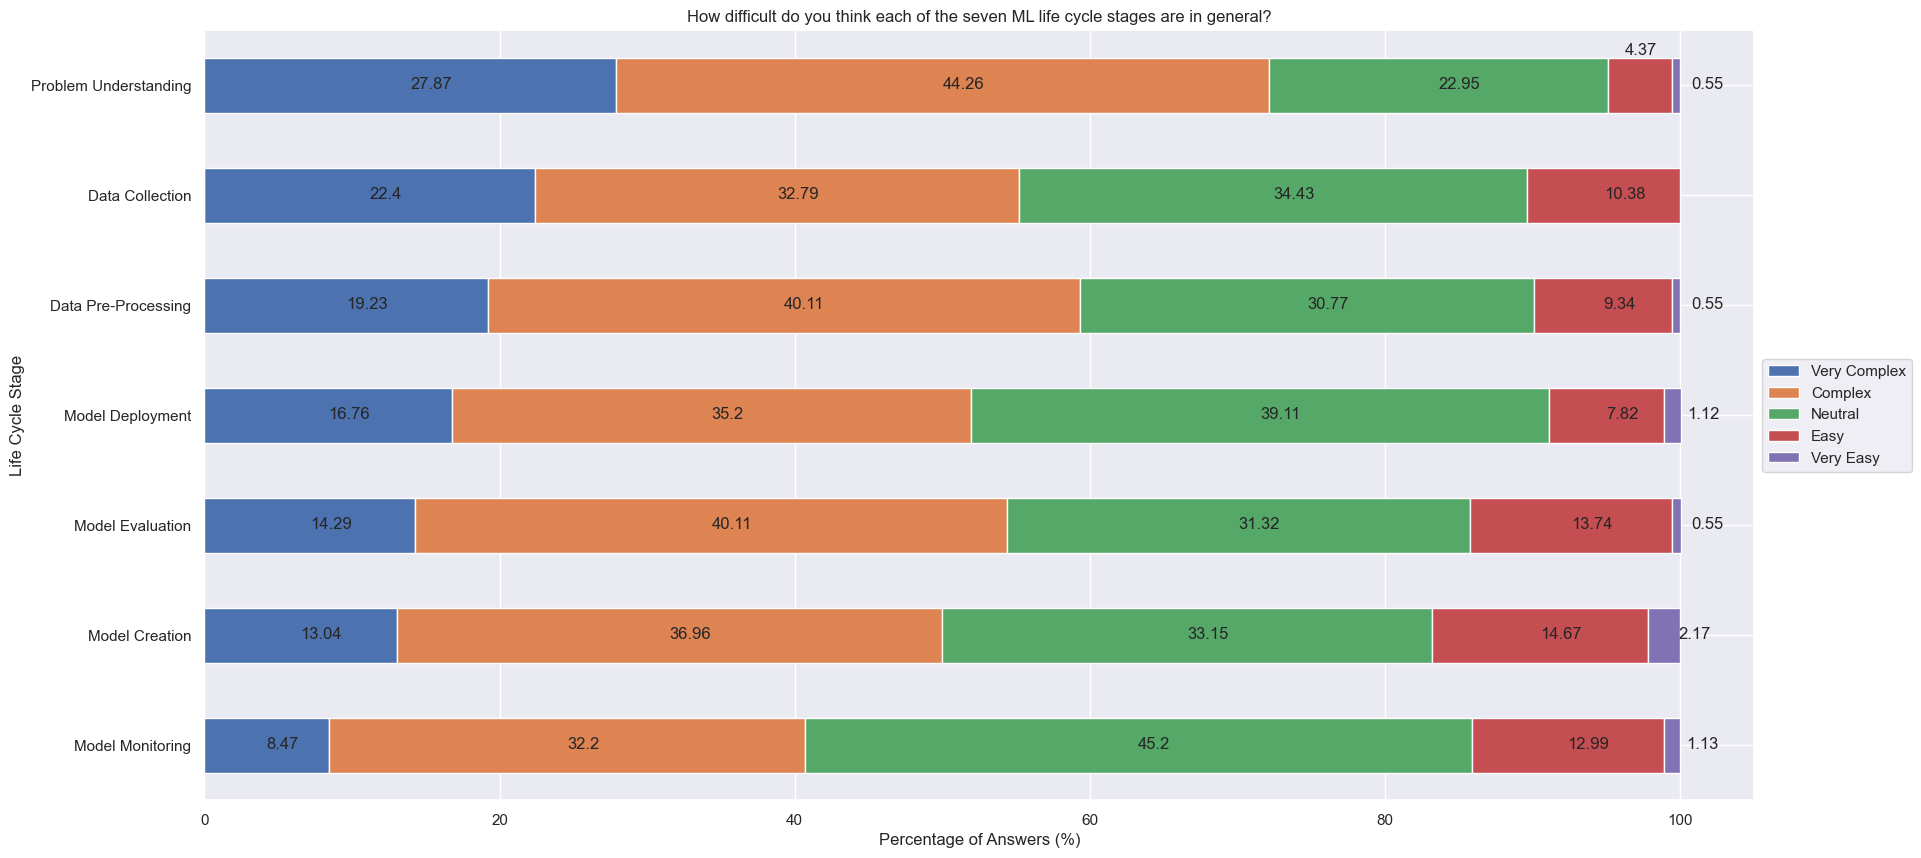

In [7]:
import matplotlib.pyplot as plt
# expected df: https://stackoverflow.com/a/60895640

ax = q2_plot.df.plot(kind='barh', stacked=True, figsize=(20, 10), rot=0, 
                     xlabel='Percentage of Answers (%)', ylabel='Life Cycle Stage', title="How difficult do you think each of the seven ML life cycle stages are in general?")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
total_containers = len(ax.containers) - 1
idx_containers = 0
for c in ax.containers:
    for rect in c:
        width = rect.get_width()
        if width > 0:
            x = rect.get_x() + width / 2 # Posição horizontal do rótulo
            if width < 7:
                if idx_containers == total_containers:
                    x = x + 1
                else:
                    x = x - 1
            y = rect.get_y() + rect.get_height() / 2 # Posição vertical do rótulo
            label = f'{round(width, 2)}'  # Texto do rótulo
            ax.annotate(label, (x, y), xytext=(0, -2.5) if width > 7 or idx_containers == total_containers else (0, 22), textcoords="offset points")
    idx_containers += 1


### Bootstrapping Analysis

In [8]:
# each ML stage has a different distribution of answers in bootstrapping
index_plot_df = []
# plot object for bootstrapped data
data_plot_df = {"Very Complex": [],
                "Complex": [],
                "Neutral": [],
                "Easy": [],
                "Very Easy": [],
                # "I don't know": []
               }

for ml_stage in ml_stages:
    valid_options_list = list(dataframe_obj.df[ml_stage].unique())
    valid_answers_list = list(dataframe_obj.df[ml_stage])
    
    replacements = 1000
    population_sample_size = len(dataframe_obj.df[ml_stage]) # equals n - total valid answers

    bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)
    
    bootstrapped_dict_data = bootstrapping_obj.bootstrapping("single")
    
    # get a pair of values between dict key and all the list values inside that key 
    # key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
    indexes = []
    values = []
    for idx in bootstrapped_dict_data:
        indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]['population']))]
        values += bootstrapped_dict_data[idx]['population']
    
    # barplot data
    index_plot_df.append(ml_stages[ml_stage])
    for dpd in data_plot_df:
        # take the mean of each relevance for this ml stage
        mean_relevance_list = []
        for idx, val in zip(indexes, values):    
            if idx == dpd:
                mean_relevance_list.append(val)
    
        total_count = np.mean(mean_relevance_list)
        data_plot_df[dpd].append(total_count if total_count else 0)
        
    # confidence for each option
    print("Option " + ml_stages[ml_stage] + ": (Lower Value, Mean, Upper Value)")
    for idx in bootstrapped_dict_data:
        print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))
    
    print(20*"---")

# plot object
q2_boot_plot = PlotUtils(pd.DataFrame(
    data=data_plot_df, index=index_plot_df
).sort_values(by=['Very Complex'], ascending=True))
# turn into percentage the values in each row
q2_boot_plot.df = q2_boot_plot.df.div(q2_boot_plot.df.sum(axis=1), axis=0).mul(100).round(2)

Option Problem Understanding: (Lower Value, Mean, Upper Value)
I don't know:(0.3342727301173199, 0.33610507246376814, 0.3379374148102164)
Complex:(0.2917409079599858, 0.2934855072463768, 0.29523010653276777)
Neutral:(0.15172870725281432, 0.15304347826086956, 0.1543582492689248)
Very Complex:(0.18372387217999422, 0.1852101449275362, 0.1866964176750782)
Easy:(0.027948838147540712, 0.028576086956521734, 0.029203335765502755)
Very Easy:(0.003343656636399948, 0.0035797101449275364, 0.003815763653455125)
------------------------------------------------------------


C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-lcinjCty\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-lcinjCty\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Option Data Collection: (Lower Value, Mean, Upper Value)
I don't know:(0.3346243480573098, 0.3364782608695652, 0.33833217368182067)
Complex:(0.2152306169783689, 0.2167644927536232, 0.2182983685288775)
Very Complex:(0.1466418216918317, 0.1480072463768116, 0.14937267106179147)
Easy:(0.06821337070965111, 0.06919565217391305, 0.07017793363817498)
Neutral:(0.22799294921289975, 0.22955434782608694, 0.23111574643927413)
------------------------------------------------------------
Option Data Pre-Processing: (Lower Value, Mean, Upper Value)
I don't know:(0.339861449412804, 0.34159057971014495, 0.3433197100074859)
Very Complex:(0.12576074622051203, 0.1269673913043478, 0.1281740363881836)
Complex:(0.26329569527528507, 0.264963768115942, 0.266631840956599)
Easy:(0.06026198981666941, 0.061137681159420296, 0.062013372502171184)
Neutral:(0.20035549230921276, 0.20186956521739127, 0.20338363812556978)
Very Easy:(0.0032426821936999244, 0.003471014492753623, 0.003699346791807322)
-----------------------

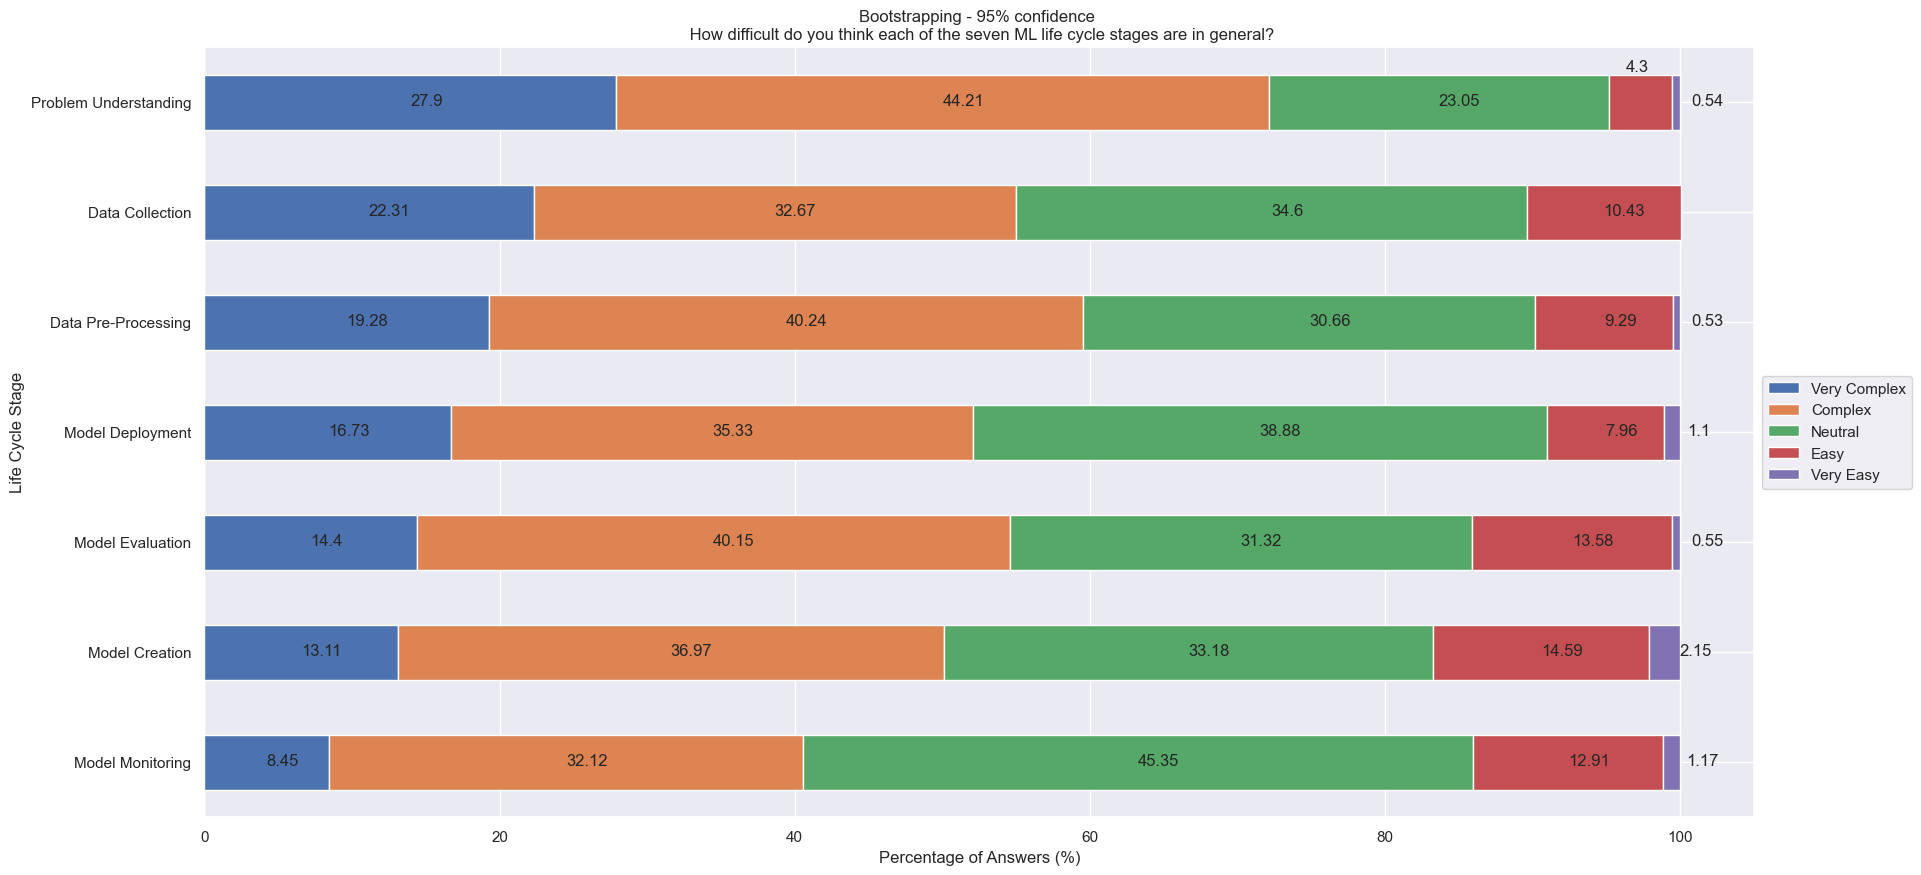

In [9]:
import matplotlib.pyplot as plt
# expected df: https://stackoverflow.com/a/60895640

ax = q2_boot_plot.df.plot(kind='barh', stacked=True, figsize=(20, 10), rot=0, 
                     xlabel='Percentage of Answers (%)', ylabel='Life Cycle Stage', title="Bootstrapping - 95% confidence \n How difficult do you think each of the seven ML life cycle stages are in general?")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
total_containers = len(ax.containers) - 1
idx_containers = 0
for c in ax.containers:
    for rect in c:
        width = rect.get_width()
        if width > 0:
            x = rect.get_x() + width / 2 # Posição horizontal do rótulo
            if width < 7:
                if idx_containers == total_containers:
                    x = x + 1
                else:
                    x = x - 1
            y = rect.get_y() + rect.get_height() / 2 # Posição vertical do rótulo
            label = f'{round(width, 2)}'  # Texto do rótulo
            ax.annotate(label, (x, y), xytext=(0, -2.5) if width > 7 or idx_containers == total_containers else (0, 22), textcoords="offset points")
    idx_containers += 1